# * **Loan Prediction** *

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import LabelEncoder,StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,RandomizedSearchCV,GridSearchCV
from sklearn.metrics import accuracy_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

## Loading Dataset

In [2]:
data = pd.read_csv("train_loan.csv")

In [3]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
rows,col = data.shape
print(f"Rows:{rows} \nColumns:{col}")

Rows:614 
Columns:13


In [6]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

## **Univarient Analysis**

In [7]:
data.Loan_Status.value_counts()

Loan_Status
Y    422
N    192
Name: count, dtype: int64

In [8]:
data.Loan_Status.value_counts(normalize=True)

Loan_Status
Y    0.687296
N    0.312704
Name: proportion, dtype: float64

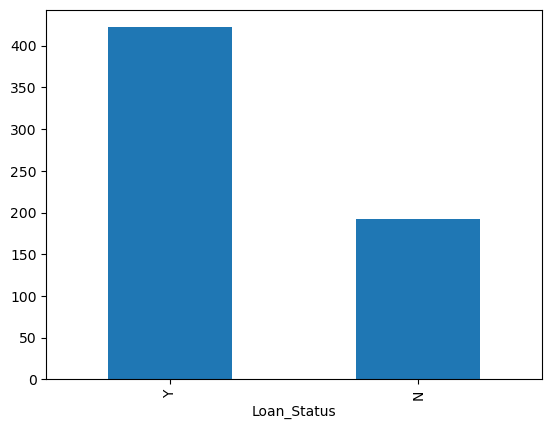

In [9]:
data.Loan_Status.value_counts().plot.bar()
plt.show()

### Visualization of Categorical variables

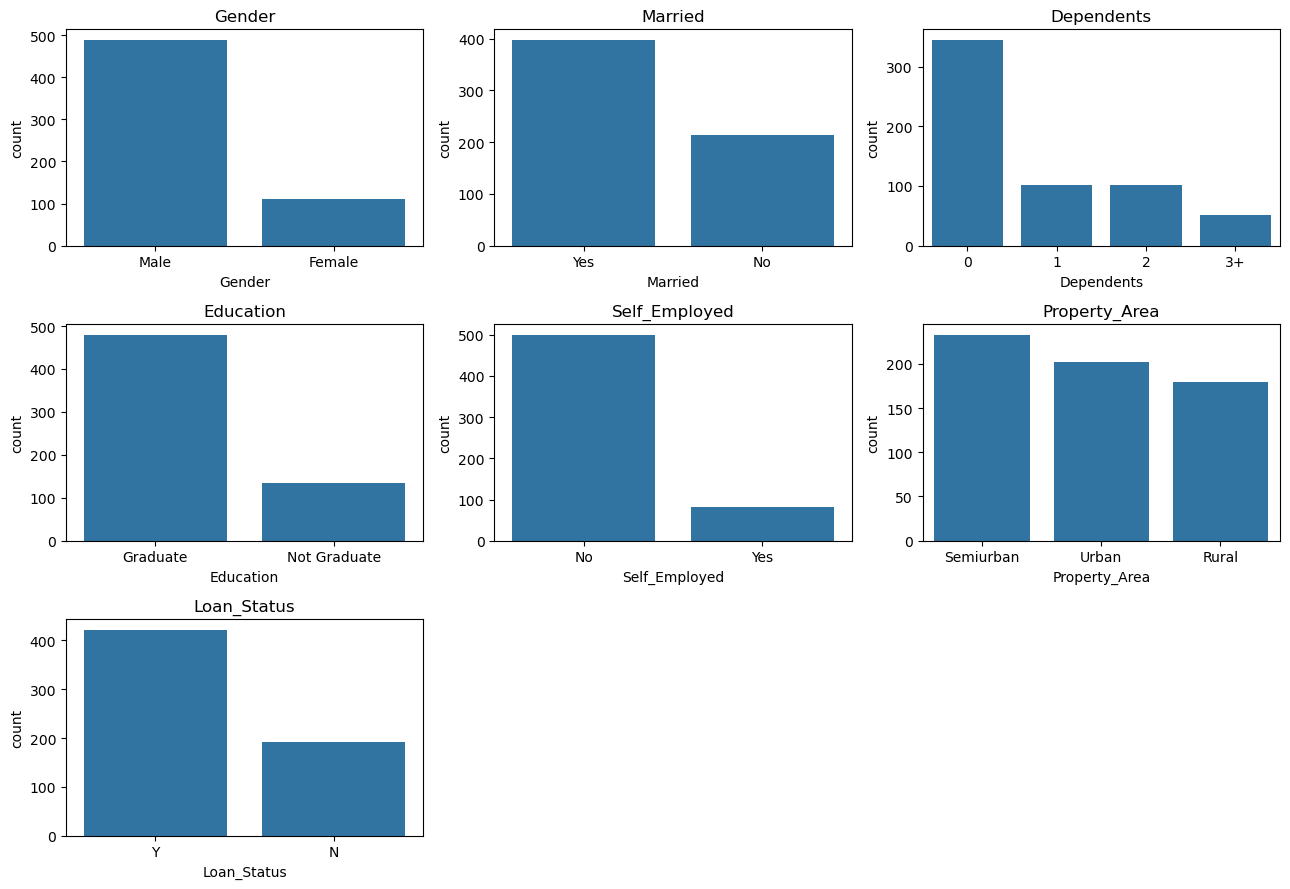

In [10]:
col = data.select_dtypes(object).iloc[:,1:]
plt.figure(figsize=(13,9))
for i,j in enumerate(col.columns,1):
    plt.subplot(3,3,i)
    sns.barplot(col[j].value_counts())
    plt.title(j)
plt.tight_layout()
plt.show()

### Visualization of Numerical variables

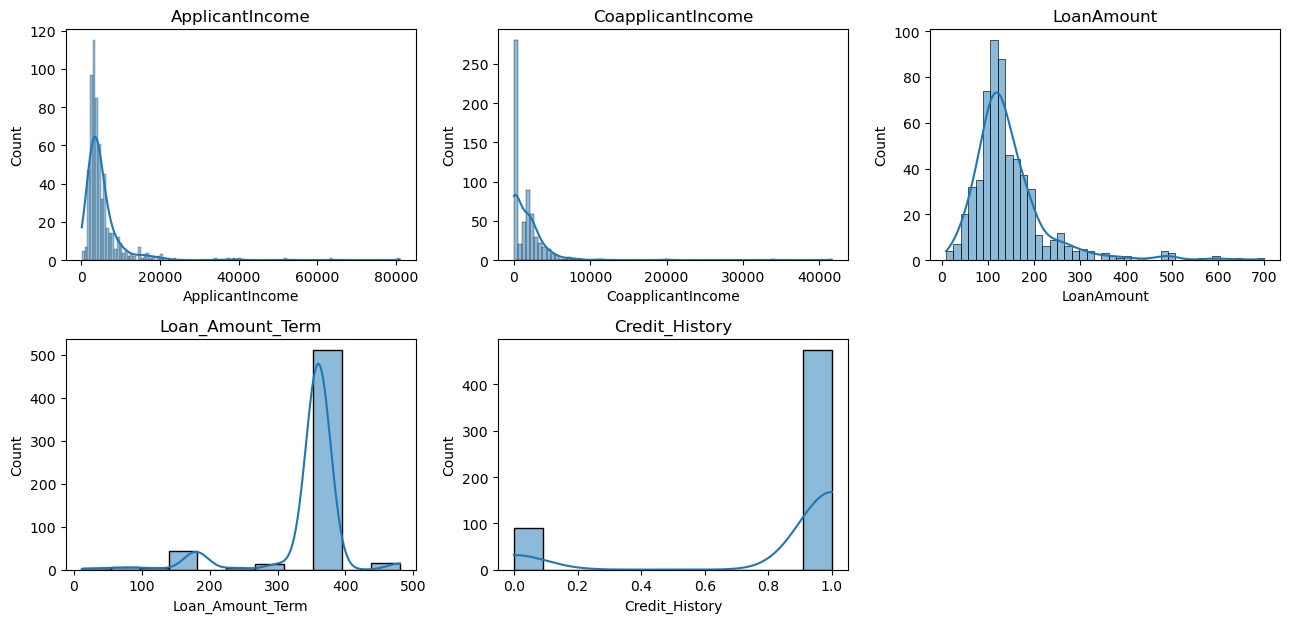

In [11]:
col = data.select_dtypes("number")
plt.figure(figsize=(13,9))
for i,j in enumerate(col.columns,1):
    plt.subplot(3,3,i)
    sns.histplot(col[j],kde=True)
    plt.title(j)
plt.tight_layout()
plt.show()

## **Bivarient Analysis**

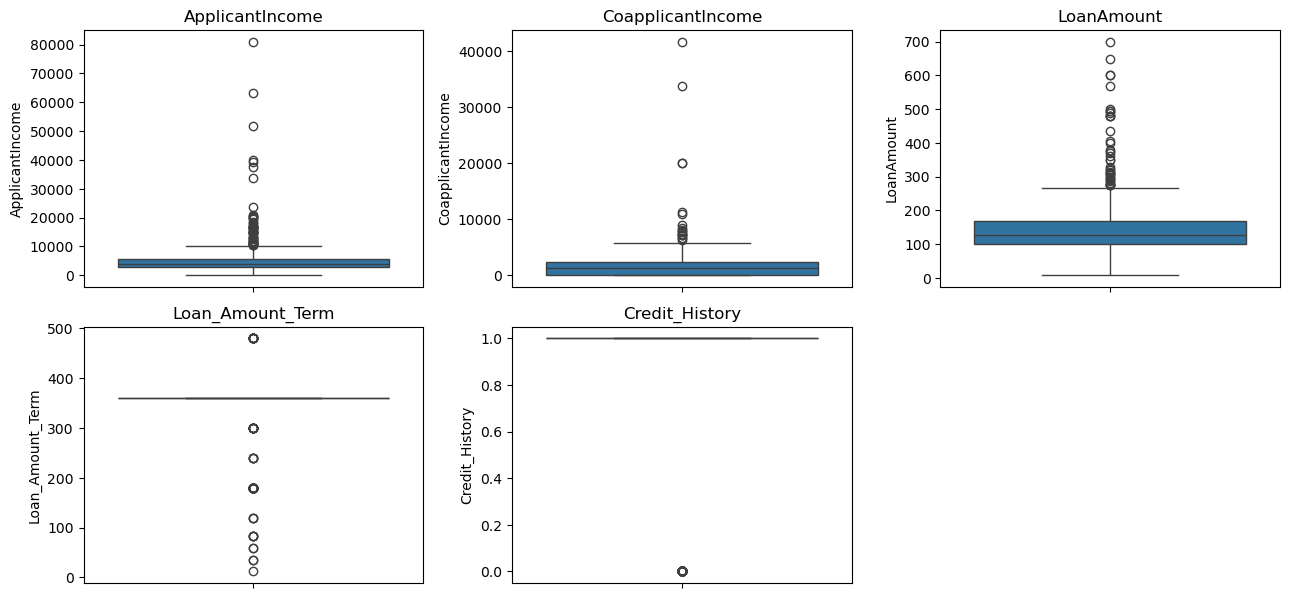

In [12]:
col = data.select_dtypes("number")
plt.figure(figsize=(13,9))
for i,j in enumerate(col.columns,1):
    plt.subplot(3,3,i)
    sns.boxplot(col[j])
    plt.title(j)
plt.tight_layout()
plt.show()

In [13]:
data.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N


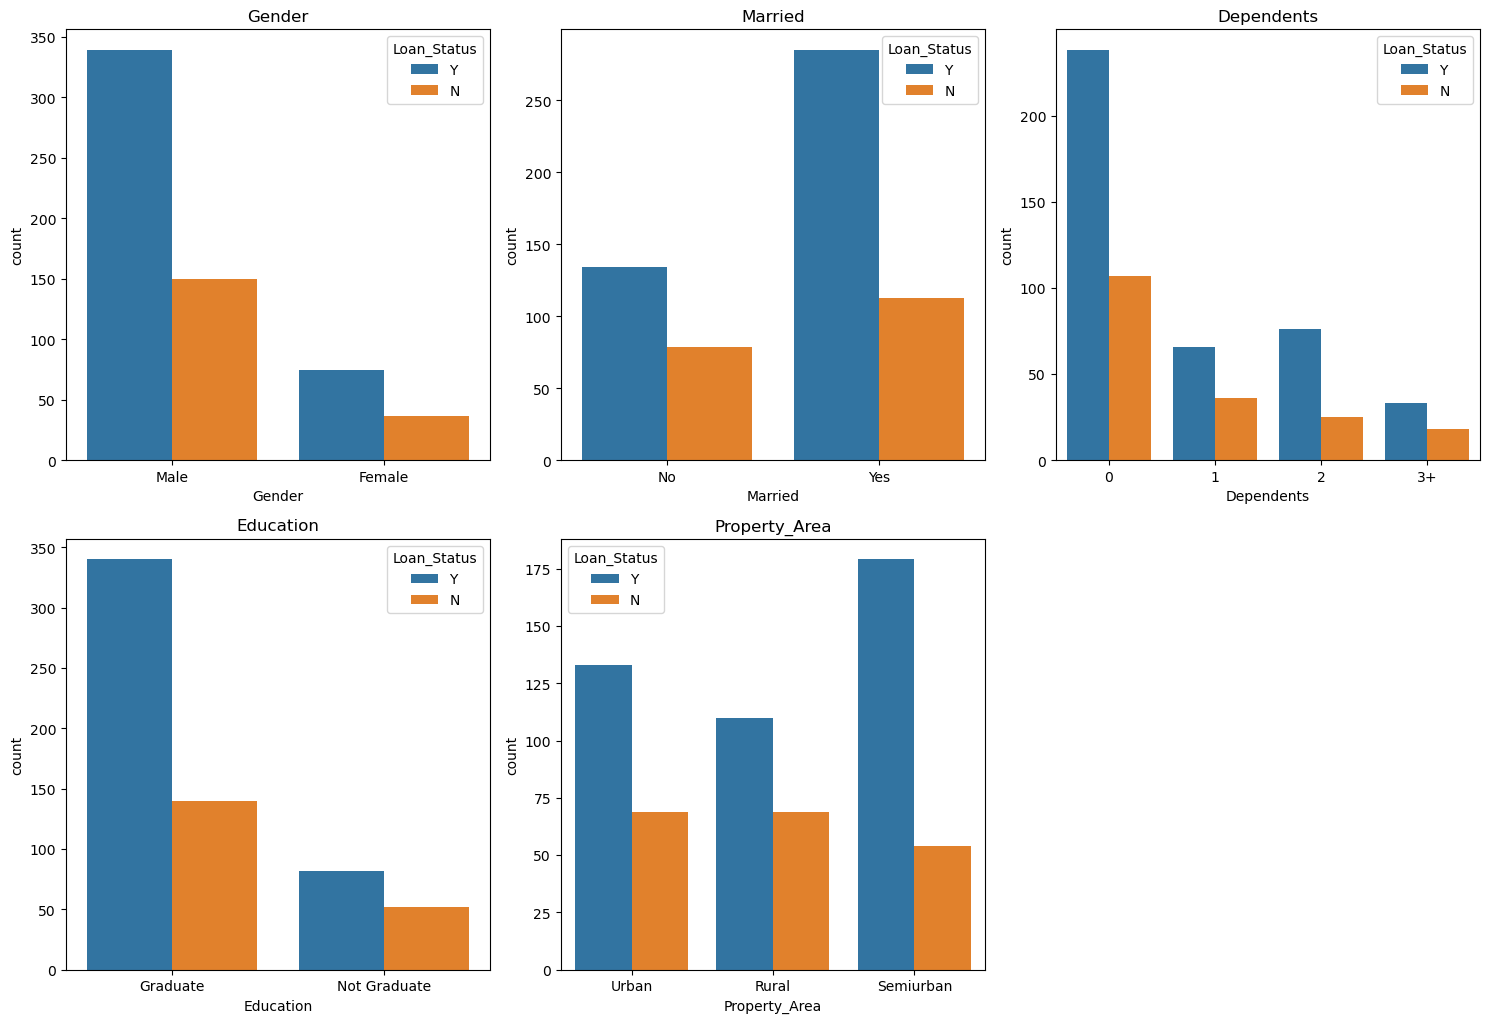

In [14]:
col = data[["Gender","Married","Dependents","Education","Property_Area"]]
plt.figure(figsize=(15,15))
for i,j in enumerate(col.columns,1):
    plt.subplot(3,3,i)
    sns.countplot(data=data, x=j, hue= "Loan_Status")
    plt.title(j)
plt.tight_layout()
plt.show()


## **Missing Value Treatment**

In [15]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [16]:
for i in data.columns:
    if data[i].dtype == "object":
        data[i] = data[i].fillna(data[i].mode()[0])
    else:
        data[i] = data[i].fillna(data[i].mean())
        

In [17]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

## **Outlier Treatment**

In [18]:
data["ApplicantIncome"] = np.log(data.ApplicantIncome)
# data["CoapplicantIncome"] = np.log(data.CoapplicantIncome)
data["LoanAmount"] = np.log(data.LoanAmount)

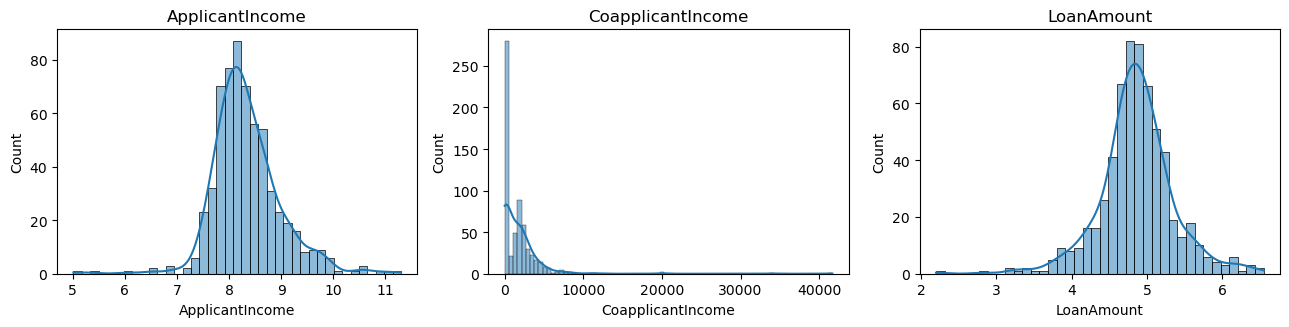

In [19]:
col = data[["ApplicantIncome","CoapplicantIncome","LoanAmount"]]
plt.figure(figsize=(13,9))
for i,j in enumerate(col.columns,1):
    plt.subplot(3,3,i)
    sns.histplot(col[j],kde=True)
    plt.title(j)
plt.tight_layout()
plt.show()

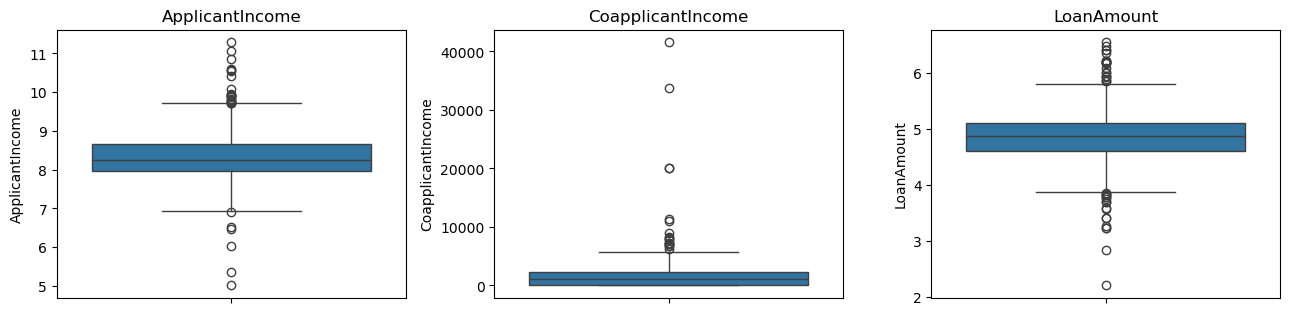

In [20]:
col = data[["ApplicantIncome","CoapplicantIncome","LoanAmount"]]
plt.figure(figsize=(13,9))
for i,j in enumerate(col.columns,1):
    plt.subplot(3,3,i)
    sns.boxplot(col[j])
    plt.title(j)
plt.tight_layout()
plt.show()

## **Encoding**

In [21]:
data.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,8.674026,0.0,4.986426,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,8.430109,1508.0,4.852030,360.0,1.0,Rural,N


In [22]:
col = data[["Gender","Married","Education","Self_Employed","Property_Area","Loan_Status","Dependents"]]
label_encoder = LabelEncoder()
for i in col.columns:
    data[i] = label_encoder.fit_transform(data[i])

## **Model Building**

In [23]:
data = data.drop(columns="Loan_ID")

In [24]:
X,Y = data.drop(columns="Loan_Status"),data.Loan_Status

In [59]:
scalar = StandardScaler()
x_scaled = scalar.fit_transform(X)

In [60]:
x_trn,x_tst,y_trn,y_tst = train_test_split(x_scaled,Y,test_size=.20,random_state=42)

In [61]:
log = LogisticRegression()
log.fit(x_trn,y_trn)

LogisticRegression()

In [62]:
pred = log.predict(x_tst)
acc = accuracy_score(y_tst,pred)
acc

0.7886178861788617

### Hyperparameter tuning

In [63]:
param = {"C":[0.01,0.1,1,10,100],"penalty":["l1","l2","elasticnet","None"],
        "solver":['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
        "max_iter":[100,200,300,400]}

grid = GridSearchCV(log,param_grid=param , cv=5,scoring='accuracy',verbose=1)
grid.fit(x_trn,y_trn)
grid.best_params_

Fitting 5 folds for each of 480 candidates, totalling 2400 fits


{'C': 0.01, 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'}

In [66]:
log1 = LogisticRegression(C=0.01,solver="lbfgs",max_iter=100,penalty="l2")
log1.fit(x_trn,y_trn)

LogisticRegression(C=0.01)

In [68]:
pred = log1.predict(x_tst)
acc = accuracy_score(y_tst,pred)
acc

0.7886178861788617

### DecisionTreeClassifier

In [69]:
dtc = DecisionTreeClassifier()
dtc.fit(x_trn,y_trn)

DecisionTreeClassifier()

In [70]:
pred = dtc.predict(x_tst)
acc = accuracy_score(y_tst,pred)
acc

0.7235772357723578

### RandomForestClassifier

In [71]:
rfc = RandomForestClassifier()
rfc.fit(x_trn,y_trn)

RandomForestClassifier()

In [72]:
pred = rfc.predict(x_tst)
acc = accuracy_score(y_tst,pred)
acc

0.7804878048780488

In [73]:
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees in the forest
    'max_depth': [10, 20, 30, None],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum samples required to be at a leaf node
    'bootstrap': [True, False]  # Whether bootstrap samples are used when building trees
}

grid_search_rf = GridSearchCV(estimator=rfc, param_grid=param_grid, 
                              cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Fit the model
grid_search_rf.fit(x_trn, y_trn)

grid_search_rf.best_params_

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


{'bootstrap': False,
 'max_depth': 10,
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 50}

In [76]:
rfc = RandomForestClassifier(bootstrap=False,max_depth=10,min_samples_leaf=1,min_samples_split=10,n_estimators = 50)
rfc.fit(x_trn,y_trn)

RandomForestClassifier(bootstrap=False, max_depth=10, min_samples_split=10,
                       n_estimators=50)

In [77]:
pred = rfc.predict(x_tst)
acc = accuracy_score(y_tst,pred)
acc

0.7642276422764228

### XGBClassifier

In [52]:
xgc = XGBClassifier()
xgc.fit(x_trn,y_trn)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [53]:
pred = xgc.predict(x_tst)
acc = accuracy_score(y_tst,pred)
acc

0.7642276422764228

### VotingClassifier

In [82]:
from sklearn.ensemble import VotingClassifier
log = LogisticRegression()
ran = RandomForestClassifier()
xgc = XGBClassifier()


voting = VotingClassifier(estimators=[("Logistic",log),("random",ran),("XGb",xgc)],voting="hard")
voting.fit(x_trn,y_trn)

VotingClassifier(estimators=[('Logistic', LogisticRegression()),
                             ('random', RandomForestClassifier()),
                             ('XGb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=None, ...))])

In [83]:
pred = voting.predict(x_tst)
acc = accuracy_score(y_tst,pred)
acc

0.7804878048780488

### CatBoostClassifier 

In [89]:
cat =CatBoostClassifier()
cat.fit(x_trn,y_trn)

Learning rate set to 0.007604
0:	learn: 0.6889223	total: 209ms	remaining: 3m 29s
1:	learn: 0.6852322	total: 218ms	remaining: 1m 48s
2:	learn: 0.6815686	total: 225ms	remaining: 1m 14s
3:	learn: 0.6779793	total: 231ms	remaining: 57.6s
4:	learn: 0.6744194	total: 237ms	remaining: 47.2s
5:	learn: 0.6706258	total: 243ms	remaining: 40.3s
6:	learn: 0.6669535	total: 250ms	remaining: 35.5s
7:	learn: 0.6632107	total: 255ms	remaining: 31.6s
8:	learn: 0.6596287	total: 258ms	remaining: 28.4s
9:	learn: 0.6560527	total: 263ms	remaining: 26s
10:	learn: 0.6524771	total: 266ms	remaining: 23.9s
11:	learn: 0.6491676	total: 270ms	remaining: 22.2s
12:	learn: 0.6453424	total: 273ms	remaining: 20.7s
13:	learn: 0.6421912	total: 275ms	remaining: 19.4s
14:	learn: 0.6389996	total: 278ms	remaining: 18.3s
15:	learn: 0.6358310	total: 282ms	remaining: 17.3s
16:	learn: 0.6328688	total: 284ms	remaining: 16.4s
17:	learn: 0.6300746	total: 286ms	remaining: 15.6s
18:	learn: 0.6273493	total: 288ms	remaining: 14.9s
19:	learn:

In [90]:
pred = cat.predict(x_tst)
accuracy_score(y_tst,pred)

0.7804878048780488